In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import colorcet as cc
%reload_ext autoreload
%autoreload 2

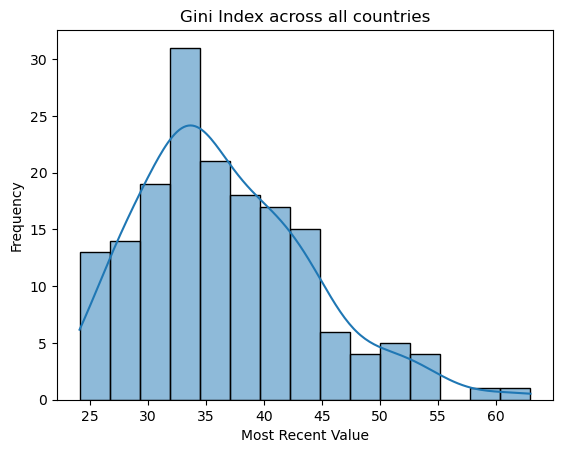

In [14]:
# Task 1: Visualizing Distributions (3 points) 
gini_df = pd.read_csv('gini_coefficients.csv')
sns.histplot(gini_df['Most Recent Value'], kde=True, bins=15)
plt.title('Gini Index across all countries')
plt.xlabel('Most Recent Value')
plt.ylabel('Frequency')
plt.savefig('distribution_plot.png')


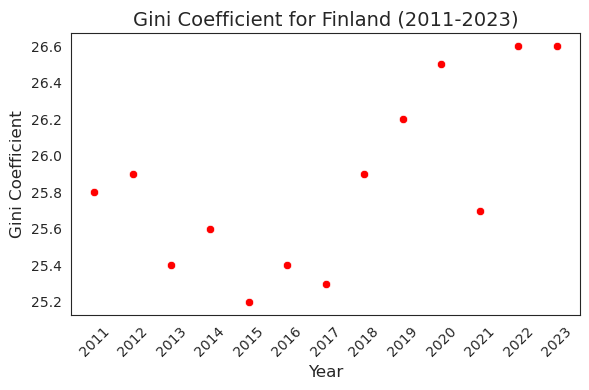

In [52]:
# Task 2: Visualizing Time Series (3 points)
fin_df = pd.read_csv('gini_fin.csv')
fin_df
# Filter Finland data and select relevant columns
finland_df = fin_df[fin_df['Member state'] == 'Finland']
finland_melted = finland_df.melt(id_vars=['Member state'], 
                                 value_vars=[str(year) for year in range(2011, 2024)],
                                 var_name='Year', 
                                 value_name='Gini Coefficient')

# Step 4: Create the scatter plot using sns.scatterplot
plt.figure(figsize=(6, 4))  # Set the figure size
sns.scatterplot(data=finland_melted, x='Year', y='Gini Coefficient', color='red')

# Step 5: Customize the plot
plt.title('Gini Coefficient for Finland (2011-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gini Coefficient', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Step 6: Display the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


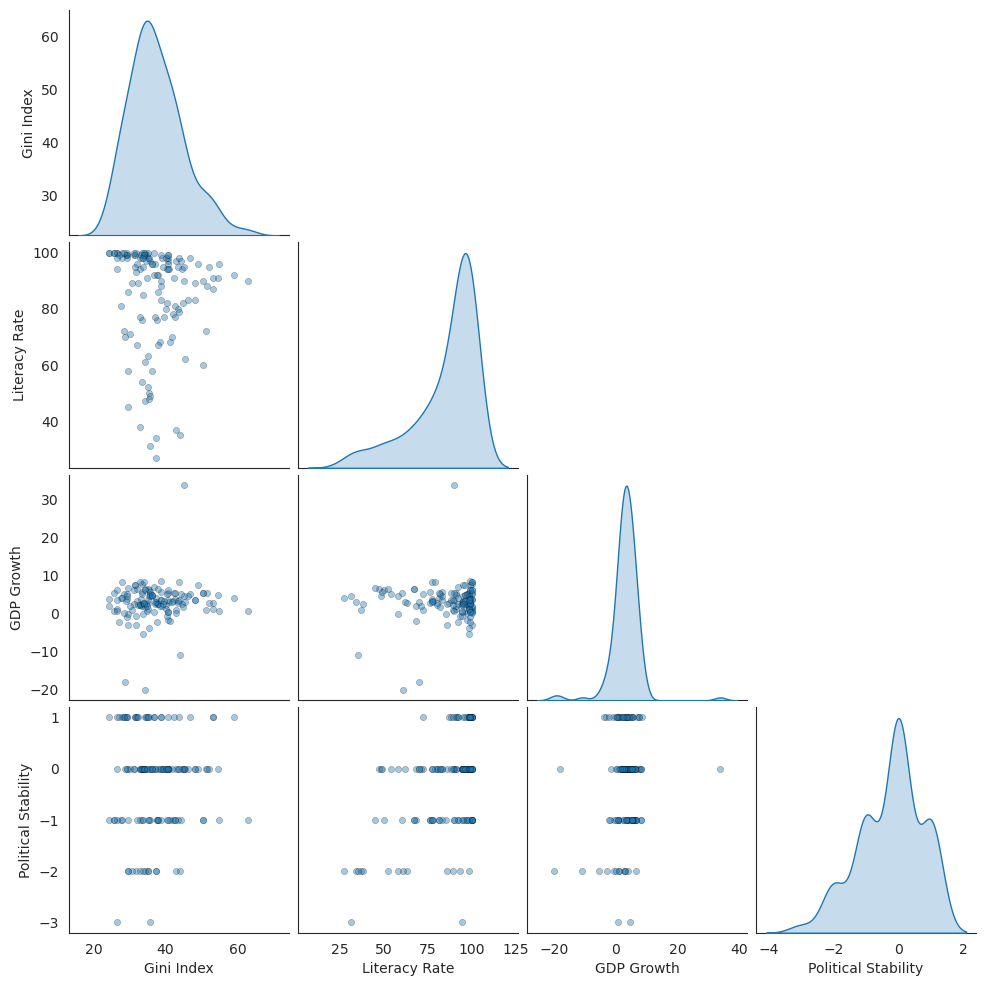

In [5]:
# Task 3: Visualizing High-Dimensional Data
merged_df = pd.read_csv('merged_file.csv')
merged_df

variables = ['Gini Index', 'Literacy Rate', 
             'GDP Growth', 'Political Stability']

sns.set_style("white")
pairplot = sns.pairplot(
    merged_df[variables].dropna(),
    diag_kind='kde',  # Use KDE for smoother distributions
    markers="o",
    plot_kws={'s': 20, 'alpha': 0.4, 'edgecolor': 'black'},
    diag_kws={'fill': True}
)
for i, j in zip(*np.triu_indices_from(pairplot.axes, k=1)):
    pairplot.axes[i, j].set_visible(False)

pairplot.savefig("pairplot.png", dpi=300, bbox_inches='tight')    
# Adjust layout and display
plt.show()
